Подключение библиотек

In [292]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='svg'
import pickle

Пути к директориям и файлам

In [293]:
 # Data files
Train = r"C:\Users\805903\project\train.csv"
Test = r"C:\Users\805903\project\test.csv"

Загрузка данных
Описание датасета

Описание датасета:
-Id - идентификационный номер квартиры
-DistrictId - идентификационный номер района
-Rooms - количество комнат
-Square - площадь
-LifeSquare - жилая площадь
-KitchenSquare - площадь кухни
-Floor - этаж
-HouseFloor - количество этажей в доме
-HouseYear - год постройки дома
-Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности
-Social_1, Social_2, Social_3 - социальные показатели местности
-Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья
-Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров
-Price - цена квартиры

Считывание датасета


In [294]:
df=pd.read_csv(Train)
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [295]:
df.shape

(10000, 20)

Получение информации о данных

In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [297]:
df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [298]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [299]:
df.describe(include='object')

,Ecology_2,Ecology_3,Shops_2
count,10000,10000,10000
unique,2,2,2
top,B,B,B
freq,9903,9725,9175


In [300]:
df['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [301]:
df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [302]:
df['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

Обработка пропусков

Определяем кол-во пропусков

In [303]:
len(df)-df.count()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [304]:
round((len(df)-df.count())*100/df.shape[0],1)

Id                0.0
DistrictId        0.0
Rooms             0.0
Square            0.0
LifeSquare       21.1
KitchenSquare     0.0
Floor             0.0
HouseFloor        0.0
HouseYear         0.0
Ecology_1         0.0
Ecology_2         0.0
Ecology_3         0.0
Social_1          0.0
Social_2          0.0
Social_3          0.0
Healthcare_1     48.0
Helthcare_2       0.0
Shops_1           0.0
Shops_2           0.0
Price             0.0
dtype: float64

Заполним пропущенные значения в столбце LifeSquare значениями медианы, сгруппированными по столбцу Shops_2

In [315]:
#df['LifeSquare'].fillna(df['LifeSquare'].median(), inplace=True)'df['LifeSquare'].describe()
df.drop('LifeSquare',axis=1, inplace=True)
df.shape

(10000, 19)

In [316]:

df.loc[df['Healthcare_1'].isna(),'Healthcare_1']=df.groupby(['Ecology_2'])['Healthcare_1'].transform(lambda x:x.median())
df['Healthcare_1'].describe()


count    10000.000000
mean      1026.358900
std        746.662828
min          0.000000
25%        830.000000
50%        900.000000
75%        990.000000
max       4849.000000
Name: Healthcare_1, dtype: float64

Для обработки выбросов принимаем общая площадь не может быть меньше площади кухни и общая площадь не может быть меньше жилой площади

In [317]:
#df[(df['Square']<df['LifeSquare']) | (df['Square']<df['KitchenSquare'])]
df['Square']<df['KitchenSquare']

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [318]:
#df.loc[(df['Square']<df['LifeSquare']), 'Square']=df['Square'].median()
#df.loc[(df['Square']<df['LifeSquare']), 'LifeSquare']=df['LifeSquare'].median()
df.loc[(df['Square']<df['KitchenSquare']), 'KitchenSquare']=df['KitchenSquare'].median()

In [319]:
df.shape

(10000, 19)

In [320]:
#df[['Square','LifeSquare','KitchenSquare']].median()
df[['Square','KitchenSquare']].median()

Square           52.51331
KitchenSquare     6.00000
dtype: float64

In [321]:
#df[['Square','LifeSquare','KitchenSquare']].mean()
df[['Square','KitchenSquare']].mean()

Square           56.315775
KitchenSquare     5.861600
dtype: float64

In [322]:
df[['Square','KitchenSquare']].max()

Square           641.065193
KitchenSquare    123.000000
dtype: float64

In [323]:
df.cov()

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
Id,2.361007e+07,2.747544e+03,-23.850342,-1.030511e+03,241.165042,34.322197,-275.778030,4.875103e+06,10.466502,-65.729663,-3.958421e+04,-1083.644646,-1.034234e+04,10.899330,-203.594160,4.458647e+06
DistrictId,2.747544e+03,1.899878e+03,2.613849,-2.442765e+01,42.140985,-27.499151,-44.021850,1.173708e+05,0.338747,188.348085,2.924961e+04,141.371526,8.630521e+03,19.930937,36.497345,1.073148e+06
Rooms,-2.385034e+01,2.613849e+00,0.704780,1.171932e+01,0.489494,-0.002927,-0.166687,-1.786198e+03,-0.003232,1.118338,2.399547e+02,0.256318,2.274487e+01,0.079693,0.216349,4.290473e+04
Square,-1.030511e+03,-2.442765e+01,11.719321,4.434702e+02,11.839622,12.669665,11.630168,-3.813425e+04,-0.161618,-26.099869,-3.638403e+03,17.686202,-5.480143e+02,-0.722163,2.161707,1.017148e+06
KitchenSquare,2.411650e+02,4.214098e+01,0.489494,1.183962e+01,25.709216,-0.268532,4.745916,6.308424e+03,0.012992,25.420523,5.320093e+03,-7.196194,2.896185e+02,1.199639,1.966009,1.203978e+05
Floor,3.432220e+01,-2.749915e+01,-0.002927,1.266967e+01,-0.268532,27.469634,14.879817,9.751562e+02,-0.010064,-4.127156,-3.477545e+02,-0.279375,-4.153078e+02,-0.513032,0.611235,6.265313e+04
HouseFloor,-2.757780e+02,-4.402185e+01,-0.166687,1.163017e+01,4.745916,14.879817,45.913823,-1.174024e+03,-0.003518,-2.471205,1.953040e+02,-1.314020,-5.290903e+02,-0.695573,0.855831,5.555448e+04
HouseYear,4.875103e+06,1.173708e+05,-1786.198010,-3.813425e+04,6308.424258,975.156225,-1174.023646,4.020035e+10,34.951017,10638.261178,1.582617e+06,3912.516233,-1.534512e+06,3367.644632,3547.540189,8.017040e+07
Ecology_1,1.046650e+01,3.387471e-01,-0.003232,-1.616182e-01,0.012992,-0.010064,-0.003518,3.495102e+01,0.014167,0.055226,4.417920e+00,-0.351932,3.888005e-01,0.005488,-0.043906,-6.453494e+02
Social_1,-6.572966e+01,1.883481e+02,1.118338,-2.609987e+01,25.420523,-4.127156,-2.471205,1.063826e+04,0.055226,307.392570,6.715788e+04,9.911561,9.936474e+02,13.737377,44.347732,4.287068e+05


In [324]:
df.corr()

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
Id,1.000000,0.012973,-0.005847,-0.010071,0.009789,0.001348,-0.008376,0.005004,0.018097,-0.000772,-0.002033,-0.009358,-0.002851,0.001502,-0.008718,0.009880
DistrictId,0.012973,1.000000,0.071432,-0.026613,0.190677,-0.120373,-0.149051,0.013430,0.065294,0.246463,0.167479,0.136095,0.265185,0.306147,0.174214,0.265100
Rooms,-0.005847,0.071432,1.000000,0.662893,0.114994,-0.000665,-0.029302,-0.010612,-0.032347,0.075980,0.071335,0.012811,0.036285,0.063557,0.053618,0.550291
Square,-0.010071,-0.026613,0.662893,1.000000,0.110882,0.114791,0.081505,-0.009032,-0.064479,-0.070690,-0.043120,0.035241,-0.034853,-0.022960,0.021357,0.520075
KitchenSquare,0.009789,0.190677,0.114994,0.110882,1.000000,-0.010105,0.138135,0.006205,0.021527,0.285952,0.261865,-0.059553,0.076499,0.158406,0.080673,0.255675
Floor,0.001348,-0.120373,-0.000665,0.114791,-0.010105,1.000000,0.418986,0.000928,-0.016133,-0.044914,-0.016560,-0.002237,-0.106125,-0.065537,0.024264,0.128715
HouseFloor,-0.008376,-0.149051,-0.029302,0.081505,0.138135,0.418986,1.000000,-0.000864,-0.004362,-0.020801,0.007194,-0.008137,-0.104576,-0.068728,0.026279,0.088280
HouseYear,0.005004,0.013430,-0.010612,-0.009032,0.006205,0.000928,-0.000864,1.000000,0.001465,0.003026,0.001970,0.000819,-0.010250,0.011245,0.003681,0.004305
Ecology_1,0.018097,0.065294,-0.032347,-0.064479,0.021527,-0.016133,-0.004362,0.001465,1.000000,0.026464,0.009264,-0.124068,0.004375,0.030873,-0.076749,-0.058381
Social_1,-0.000772,0.246463,0.075980,-0.070690,0.285952,-0.044914,-0.020801,0.003026,0.026464,1.000000,0.955988,0.023721,0.075903,0.524593,0.526272,0.263286


In [325]:
df.corr()['Price'].sort_values()

Ecology_1       -0.058381
HouseYear        0.004305
Id               0.009880
Social_3         0.074878
HouseFloor       0.088280
Healthcare_1     0.128059
Floor            0.128715
Shops_1          0.180876
Social_2         0.239226
Helthcare_2      0.253090
KitchenSquare    0.255675
Social_1         0.263286
DistrictId       0.265100
Square           0.520075
Rooms            0.550291
Price            1.000000
Name: Price, dtype: float64

In [326]:
df.head()

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,900.0,0,11,B,184966.930730
1,15053,41,3.0,65.683640,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


Преобразование в бинарные переменные

In [327]:
Ec2=pd.get_dummies(df['Ecology_2'])
Ec2

,A,B
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
9995,0,1
9996,0,1
9997,0,1
9998,0,1


In [328]:
Ec3=pd.get_dummies(df['Ecology_3'])
Ec3

,A,B
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
9995,0,1
9996,0,1
9997,0,1
9998,1,0


In [329]:
Sh2=pd.get_dummies(df['Shops_2'])
Sh2

,A,B
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
9995,0,1
9996,1,0
9997,1,0
9998,0,1


Построим гистограмму для целевой переменной Price

Text(0.5, 0, 'Price')

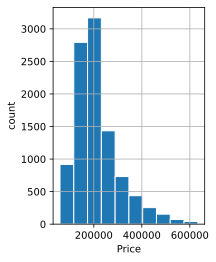

In [330]:
plt.subplot(121)
df['Price'].hist(edgecolor='white')
plt.ylabel('count')
plt.xlabel('Price')



Разбиение данных на тренировочные и тестовые

In [331]:
from sklearn.model_selection import train_test_split

In [332]:
X=df

In [333]:
y=df['Price']


In [334]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, shuffle=True, random_state=42)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(7000, 19) (7000,)
(3000, 19) (3000,)


In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  object 
 10  Ecology_3      10000 non-null  object 
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Healthcare_1   10000 non-null  float64
 15  Helthcare_2    10000 non-null  int64  
 16  Shops_1        10000 non-null  int64  
 17  Shops_2        10000 non-null  object 
 18  Price  

Стандартизация признаков

In [336]:
feature_num=X_train.select_dtypes(include='float64').columns.tolist()
feature_num

['Rooms',
 'Square',
 'KitchenSquare',
 'HouseFloor',
 'Ecology_1',
 'Healthcare_1',
 'Price']

In [337]:
from sklearn.preprocessing import StandardScaler

In [338]:
scaler=StandardScaler()

In [339]:
X_train_scaled=pd.DataFrame(scaler.fit_transform(X_train[feature_num]), columns=feature_num, index=X_train.index)
X_test_scaled=pd.DataFrame(scaler.transform(X_test[feature_num]), columns=feature_num, index=X_test.index)

In [340]:
X_train_scaled.describe()

,Rooms,Square,KitchenSquare,HouseFloor,Ecology_1,Healthcare_1,Price
count,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03
mean,1.487937e-16,-8.057047e-18,-2.330834e-16,1.290238e-16,-3.379836e-17,-1.288493e-16,-1.639324e-16
std,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00
min,-2.240998e+00,-2.629973e+00,-1.125888e+00,-1.847149e+00,-9.936657e-01,-1.333475e+00,-1.671088e+00
25%,-1.054837e+00,-7.101714e-01,-9.351423e-01,-5.334465e-01,-8.448595e-01,-2.644708e-01,-6.441144e-01
50%,1.313250e-01,-1.791587e-01,1.858404e-02,1.963880e-01,-3.576667e-01,-1.636214e-01,-2.384801e-01
75%,1.313250e-01,4.717458e-01,5.908198e-01,6.342888e-01,6.463363e-01,-4.260207e-02,3.727128e-01
max,2.029607e+01,2.674332e+01,2.233578e+01,1.523098e+01,3.406901e+00,5.146438e+00,4.445588e+00


Проверяем линейную регрессию

In [344]:
X_train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'KitchenSquare', 'Floor',
       'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3',
       'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2',
       'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

In [345]:
feature_names=['Id', 'DistrictId', 'Rooms', 'Square', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1']

In [346]:
X_train[feature_names].head()

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
9069,14604,23,1.0,41.681380,8.0,14,17.0,2015,0.075779,6,1437,3,900.0,0,2
2603,5621,23,3.0,163.495333,12.0,5,3.0,1977,0.014073,2,475,0,900.0,0,0
7738,235,87,1.0,39.710131,8.0,4,17.0,1986,0.100456,43,7227,0,900.0,1,6
1579,16258,48,3.0,96.056784,1.0,15,1.0,2017,0.041125,46,9515,5,900.0,1,10
5058,10773,77,3.0,79.195825,10.0,16,17.0,1984,0.298205,16,4048,3,900.0,1,3


Построение модели линейной регрессии

In [347]:
from sklearn.linear_model import LinearRegression

In [348]:
lr=LinearRegression()

In [349]:
lr.fit(X_train[feature_names],y_train)

LinearRegression()

In [350]:
y_train_preds=lr.predict(X_train[feature_names])
y_test_preds=lr.predict(X_test[feature_names])


In [351]:
from sklearn.metrics import r2_score

In [352]:
r2_score(y_train,y_train_preds)

0.49953871650277837

In [353]:
r2_score(y_test,y_test_preds)

0.4655005274420507

Т.к. Показатель R2 получился 0.44 модель линейной регрессии плохо работает на этих данных

In [354]:
from sklearn.tree import DecisionTreeRegressor

In [355]:
dtr_model=DecisionTreeRegressor(random_state=42)

In [356]:
dtr_model.fit(X_train[feature_names],y_train)

DecisionTreeRegressor(random_state=42)

In [357]:
y_train_preds=dtr_model.predict(X_train[feature_names])
y_test_preds=dtr_model.predict(X_test[feature_names])

In [358]:
r2_score(y_train,y_train_preds)

1.0

In [359]:
r2_score(y_test,y_test_preds)

0.40696597757465014

In [360]:
from sklearn.ensemble import RandomForestRegressor

In [361]:
regr=RandomForestRegressor(n_estimators=1000, max_depth =2, random_state=42)

In [362]:
regr.fit(X_train[feature_names],y_train)

RandomForestRegressor(max_depth=2, n_estimators=1000, random_state=42)

In [363]:
y_train_preds=regr.predict(X_train[feature_names])
y_test_preds=regr.predict(X_test[feature_names])

In [364]:
r2_score(y_train,y_train_preds)

0.4712393271363169

In [365]:
r2_score(y_test,y_test_preds)

0.4488982488545178